In [70]:
import torch
import torch.nn
import torchvision
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.image as pltim
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np



In [71]:
device="cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(1234)
if device == 'cuda':
    torch.cuda.manual_seed_all(1234)
    
print(torch.cuda.is_available())
print(device)


True
cuda


In [72]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [73]:
dataset = torchvision.datasets.ImageFolder(root='./data/train', transform=transform)

In [74]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])


In [75]:
print(len(train_set))
print(len(test_set))

20000
5000


In [76]:
trainloader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=True, num_workers=2)

In [77]:
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3, padding=1)
        self.conv2 = nn.Conv2d(4, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, 512 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
network = ConvNeuralNetwork()
network = network.to(device)

In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.9)

In [79]:
batch_loss = list()

In [80]:
for epoch in range(20):
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        current_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print("Epoch " + str(epoch + 1) + " - Loss: " + str(current_loss/1000) )
            batch_loss.append(current_loss/1000)
            current_loss = 0.0
print('Finished Training')


Epoch 1 - Loss: 0.7808627233207226
Epoch 1 - Loss: 0.7096809893548489
Epoch 1 - Loss: 0.700310640603304
Epoch 1 - Loss: 0.671997168302536
Epoch 1 - Loss: 0.6543816395103932
Epoch 2 - Loss: 0.6332228549346328
Epoch 2 - Loss: 0.616017801374197
Epoch 2 - Loss: 0.5959346600361168
Epoch 2 - Loss: 0.5705176749192178
Epoch 2 - Loss: 0.5740766363292933
Epoch 3 - Loss: 0.5493887867629528
Epoch 3 - Loss: 0.5179225388169288
Epoch 3 - Loss: 0.5150840931534767
Epoch 3 - Loss: 0.5064118471592665
Epoch 3 - Loss: 0.5053855760134757
Epoch 4 - Loss: 0.47147466923482717
Epoch 4 - Loss: 0.46852429378777743
Epoch 4 - Loss: 0.4713011965118349
Epoch 4 - Loss: 0.46080307016335426
Epoch 4 - Loss: 0.44071242717467246
Epoch 5 - Loss: 0.4308213868374005
Epoch 5 - Loss: 0.42425140826404095
Epoch 5 - Loss: 0.4283266385812312
Epoch 5 - Loss: 0.40412504118680953
Epoch 5 - Loss: 0.4079090049862862
Epoch 6 - Loss: 0.378820949329529
Epoch 6 - Loss: 0.38358554246369747
Epoch 6 - Loss: 0.37720985036808996
Epoch 6 - Loss: 

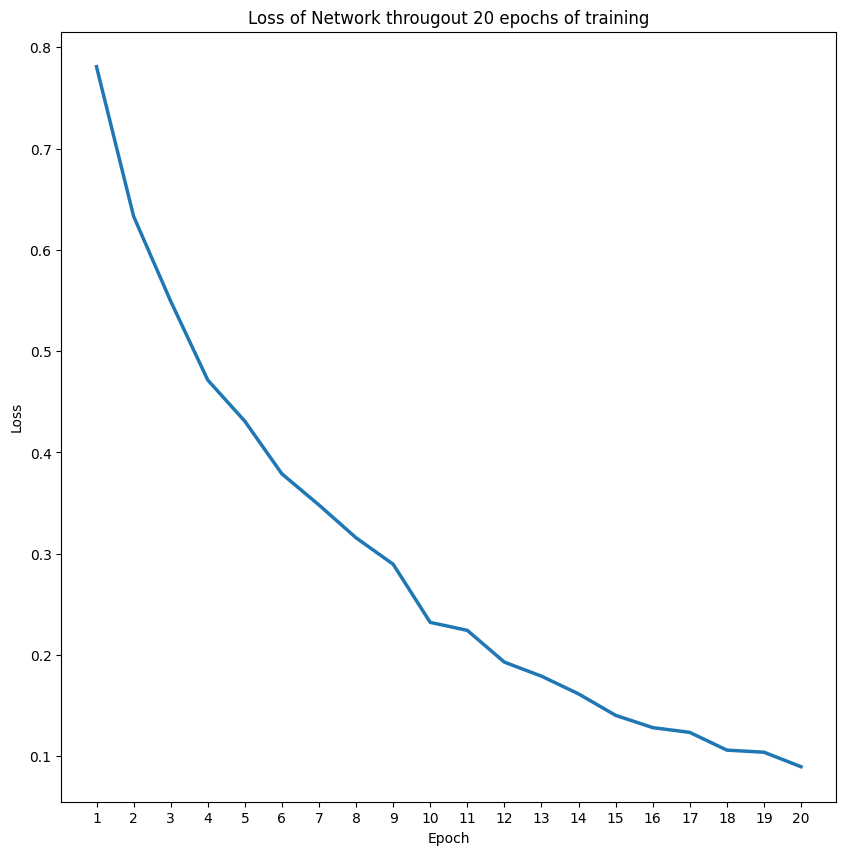

In [96]:
epoch_loss = list()
for i, lss in enumerate(batch_loss):
    if(i % 5 == 0):
        # print(i / 5 + 1, lss)
        epoch_loss.append(lss)
fig, ax = plt.subplots(figsize=(10,10), )

x_epochs = list(range(1, 21))

ax.plot(x_epochs, epoch_loss, linewidth=2.5)
ax.set_title("Loss of Network througout 20 epochs of training")
ax.set_xlabel("Epoch")
ax.set_xticks(x_epochs)
ax.set_ylabel("Loss")

plt.show()


In [82]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 5000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 5000 test images: 90 %


In [83]:
import os
from torchvision import datasets, transforms

data_dir = './data/test1'
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
dummy_label = 0
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataset.samples = [(path, dummy_label) for path, _ in dataset.samples]


In [97]:
from torch.utils.data import DataLoader

batch_size = 1
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

i = 1
for images, labels in dataloader:
    outputs = network(images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    with open('predictions.txt', 'w') as f:
        f.write(str(i) + ' - ' + str(predicted.item()) + '\n')
    i+=1